In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
X_TRAIN = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
X_TEST = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

In [3]:
## Loan status on Age over 40
df = X_TRAIN   
average_below_40 = df[df['person_age'] < 40]['loan_status'].mean()
average_above_40 = df[df['person_age'] >= 40]['loan_status'].mean()

print(f"Average loan status for people below 40: {average_below_40}")
print(f"Average loan status for people above 40: {average_above_40}")

## Approval chances increases slightly with age

Average loan status for people below 40: 0.14155054608059398
Average loan status for people above 40: 0.1584604715672677


In [4]:
average_rates = df.groupby('loan_grade')['loan_int_rate'].mean()
print(average_rates)

## interest rates rises fastly with loan grades

loan_grade
A     7.335176
B    11.034733
C    13.510343
D    15.404599
E    16.930961
F    18.610940
G    20.327576
Name: loan_int_rate, dtype: float64


In [5]:
average_rates = df.groupby('loan_grade')['loan_status'].mean()
print(average_rates)

## chances of approval also increases with loan grade
## Should be because higher interest rates would cover for higher default rates

loan_grade
A    0.049180
B    0.102304
C    0.135375
D    0.593564
E    0.625372
F    0.610738
G    0.818182
Name: loan_status, dtype: float64


In [6]:
X_TRAIN['cb_person_default_on_file'] = X_TRAIN['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

X_TEST['cb_person_default_on_file'] = X_TEST['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

In [7]:
average_rates = df.groupby('loan_grade')['cb_person_default_on_file'].mean()
print(average_rates)

## If you have defaulted very less chance for A and B grade loans, hence less applications

loan_grade
A    0.000191
B    0.000294
C    0.499547
D    0.511124
E    0.502478
F    0.543624
G    0.545455
Name: cb_person_default_on_file, dtype: float64


In [8]:
average_below_40 = df[df['person_age'] < 40]['cb_person_default_on_file'].mean()
average_above_40 = df[df['person_age'] >= 40]['cb_person_default_on_file'].mean()

print(f"Average defaults for people below 40: {average_below_40}")
print(f"Average defaults for people above 40: {average_above_40}")

## Higher age means more time to default. Recency of default is not known  

Average defaults for people below 40: 0.14802460501067055
Average defaults for people above 40: 0.1553398058252427


In [9]:
average_rates = df.groupby('loan_intent')['cb_person_default_on_file'].mean()
print(average_rates)

loan_intent
DEBTCONSOLIDATION    0.141575
EDUCATION            0.152310
HOMEIMPROVEMENT      0.171019
MEDICAL              0.145692
PERSONAL             0.147664
VENTURE              0.139247
Name: cb_person_default_on_file, dtype: float64


In [10]:
average_rates = df.groupby('loan_intent')['loan_status'].mean()
print(average_rates)

## Less support for venture and education

loan_intent
DEBTCONSOLIDATION    0.189313
EDUCATION            0.107734
HOMEIMPROVEMENT      0.173726
MEDICAL              0.178251
PERSONAL             0.132788
VENTURE              0.092798
Name: loan_status, dtype: float64


In [11]:


df = X_TRAIN   
average_below_4 = df[df['cb_person_cred_hist_length'] <= 4]['loan_status'].mean()
average_above_4 = df[df['cb_person_cred_hist_length'] > 4]['loan_status'].mean()

print(f"Average loan status for people below 4: {average_below_4}")
print(f"Average loan status for people above 4: {average_above_4}")

## One could attribute that to more time to default

Average loan status for people below 4: 0.14810059190128716
Average loan status for people above 4: 0.13554690424496518


In [12]:

df = X_TRAIN   
average_below_4 = df[df['cb_person_cred_hist_length'] <= 4]['cb_person_default_on_file'].mean()
average_above_4 = df[df['cb_person_cred_hist_length'] > 4]['cb_person_default_on_file'].mean()

print(f"Average default for people below 4: {average_below_4}")
print(f"Average default for people above 4: {average_above_4}")

## surprisingly same

Average default for people below 4: 0.148570354827597
Average default for people above 4: 0.14816201242794041


In [13]:

df = X_TRAIN   
average_below_4 = df[df['person_emp_length'] <= 4]['cb_person_default_on_file'].mean()
average_above_4 = df[df['person_emp_length'] > 4]['cb_person_default_on_file'].mean()

print(f"Average default for people below 4: {average_below_4}")
print(f"Average default for people above 4: {average_above_4}")

## People who have worked more less likely to default

Average default for people below 4: 0.16790123456790124
Average default for people above 4: 0.124953095684803


In [14]:
df = X_TRAIN   
average_below_4 = df[df['person_emp_length'] <= 4]['loan_status'].mean()
average_above_4 = df[df['person_emp_length'] > 4]['loan_status'].mean()

print(f"Average loan status for people below 4: {average_below_4}")
print(f"Average loan status for people above 4: {average_above_4}")

## And yet less likely to get loans

Average loan status for people below 4: 0.17543366150961087
Average loan status for people above 4: 0.10270168855534709


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

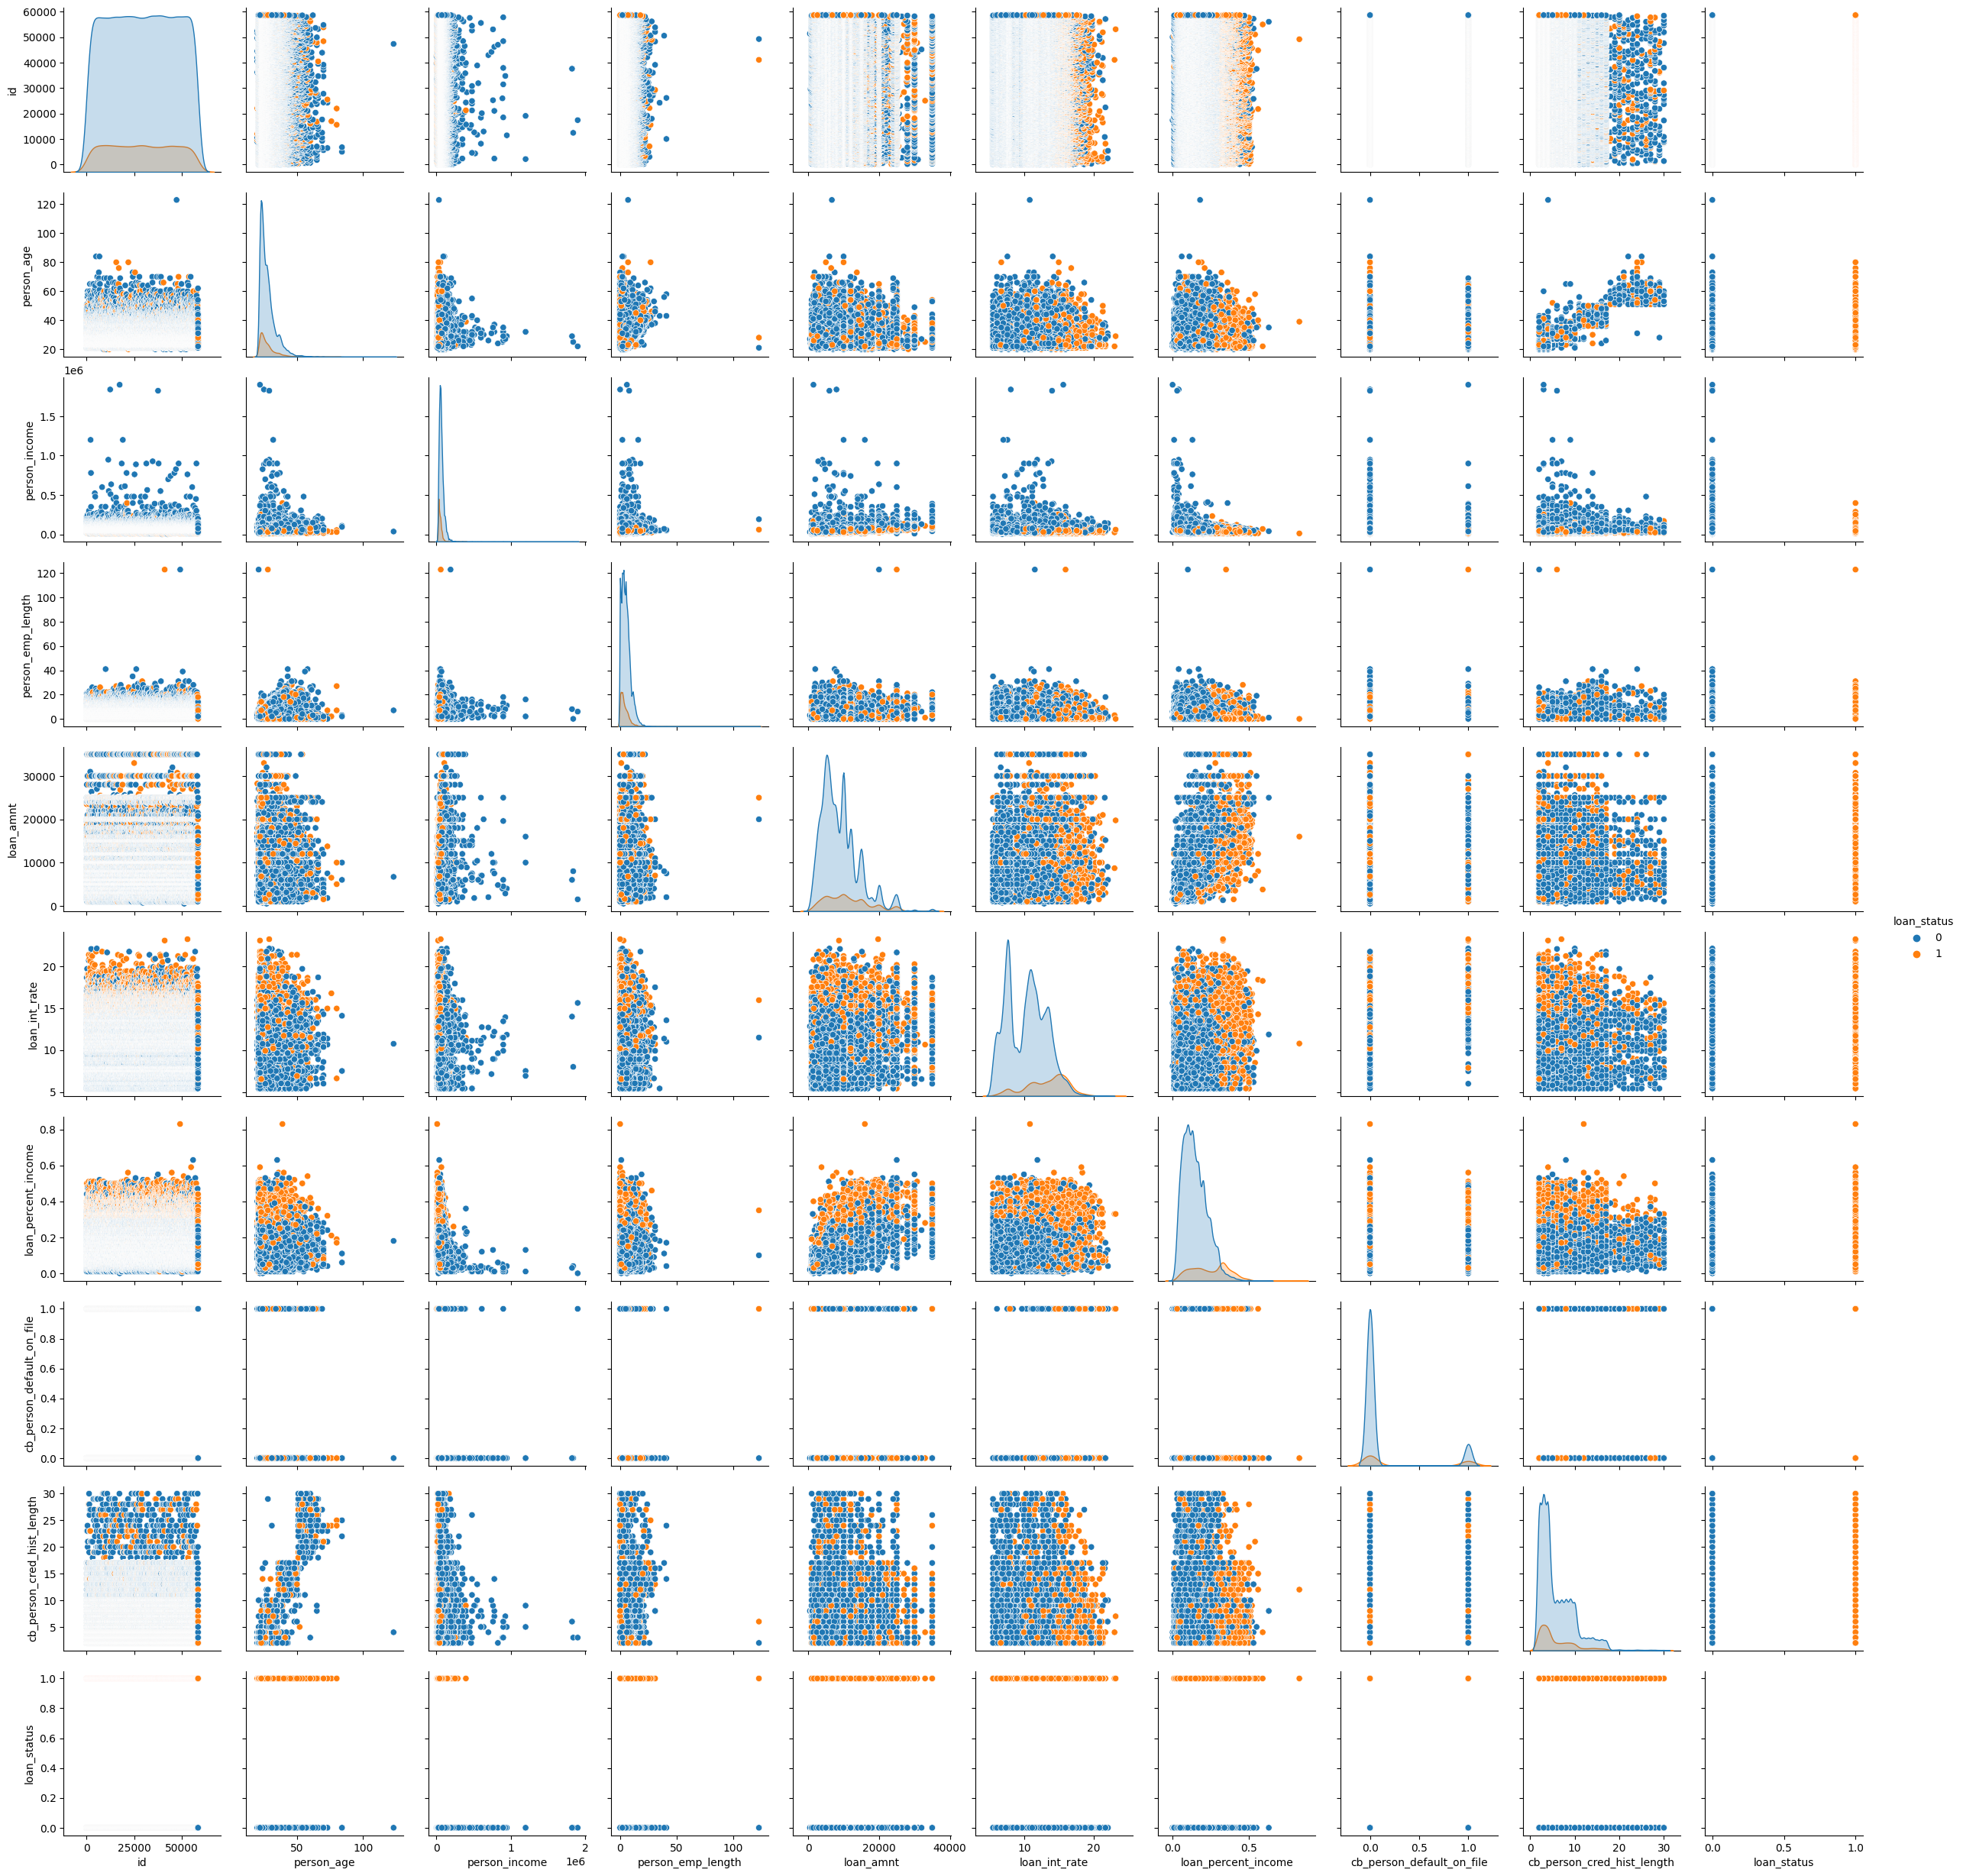

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df' and has numerical features and 'loan_status'
numerical_features = X_TRAIN.select_dtypes(['int64', 'float64']).columns.to_list()  # Select numerical columns

# Create scatter plots for all combinations
sns.pairplot(X_TRAIN, vars=numerical_features, hue='loan_status')
plt.show()

In [16]:
## As loan percent income increases, so does chance of approval
df = X_TRAIN   
average_below_4 = df[df['loan_percent_income'] <= 0.4]['loan_status'].mean()
average_above_4 = df[df['loan_percent_income'] > 0.4]['loan_status'].mean()

print(f"Average loan status for people below .4: {average_below_4}")
print(f"Average loan status for people above .4: {average_above_4}")

Average loan status for people below .4: 0.13287972437195936
Average loan status for people above .4: 0.7618510158013544
